# Machine Learning Notebook



In [1]:
import os
os.chdir("..")  # go up to the project root from /notebooks/

We will import the following libraries for the lab


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
def plot_confusion_matrix(y,y_predict):
    """
    function to plot confusion matrix
    """
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [4]:
# Load data
X = pd.read_csv("data/spacex_launch_dash.csv")
print(X.head())
X.dtypes

   flight_number   booster  payload_mass    outcome                  date_utc  \
0              1  Falcon 1     20.000000  None None  2006-03-24T22:30:00.000Z   
1              2  Falcon 1   5919.165341  None None  2007-03-21T01:10:00.000Z   
2              4  Falcon 1    165.000000  None None  2008-09-28T23:15:00.000Z   
3              5  Falcon 1    200.000000  None None  2009-07-13T03:35:00.000Z   
4              6  Falcon 9   5919.165341  None None  2010-06-04T18:45:00.000Z   

    longitude   latitude  reused  reused_count    serial landing_pad  \
0  167.743129   9.047721   False             0  Merlin1A         NaN   
1  167.743129   9.047721   False             0  Merlin2A         NaN   
2  167.743129   9.047721   False             0  Merlin2C         NaN   
3  167.743129   9.047721   False             0  Merlin3C         NaN   
4  -80.577366  28.561857   False             0     B0003         NaN   

   gridfins   legs   booster_version        orbit launch_site  class  
0     Fal

flight_number        int64
booster             object
payload_mass       float64
outcome             object
date_utc            object
longitude          float64
latitude           float64
reused                bool
reused_count         int64
serial              object
landing_pad         object
gridfins              bool
legs                  bool
booster_version     object
orbit               object
launch_site         object
class                int64
dtype: object

In [5]:
# Select features

from src.ml.features import select_features
XX=select_features(X)
print("X columns:", X.columns.tolist())
print("XX columns:", XX.columns.tolist())

X columns: ['flight_number', 'booster', 'payload_mass', 'outcome', 'date_utc', 'longitude', 'latitude', 'reused', 'reused_count', 'serial', 'landing_pad', 'gridfins', 'legs', 'booster_version', 'orbit', 'launch_site', 'class']
XX columns: ['flight_number', 'booster', 'payload_mass', 'orbit', 'launch_site', 'reused', 'legs', 'reused_count', 'longitude', 'latitude']


In [6]:
categorical_columns=['booster', 'orbit','launch_site']
preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ],
        remainder='passthrough'
    )
XXX = preprocessor.fit_transform(XX).astype(float)
new_columns = [name.split("__")[-1] for name in preprocessor.get_feature_names_out()]
X_transformed = pd.DataFrame(XXX, columns=new_columns)
print(X_transformed.dtypes)
X_transformed.tail()

booster_Falcon 1              float64
booster_Falcon 9              float64
orbit_GTO                     float64
orbit_HEO                     float64
orbit_LEO                     float64
orbit_MEO                     float64
orbit_Polar                   float64
orbit_Polar orbit             float64
orbit_SSO                     float64
orbit_Sub-orbital             float64
launch_site_CCAFS             float64
launch_site_CCSFS             float64
launch_site_Cape Canaveral    float64
launch_site_KSC               float64
launch_site_VAFB              float64
flight_number                 float64
payload_mass                  float64
reused                        float64
legs                          float64
reused_count                  float64
longitude                     float64
latitude                      float64
dtype: object


,booster_Falcon 1,booster_Falcon 9,orbit_GTO,orbit_HEO,orbit_LEO,orbit_MEO,orbit_Polar,orbit_Polar orbit,orbit_SSO,orbit_Sub-orbital,...,launch_site_Cape Canaveral,launch_site_KSC,launch_site_VAFB,flight_number,payload_mass,reused,legs,reused_count,longitude,latitude
89,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,102.0,15600.0,1.0,1.0,12.0,-80.603956,28.608058
90,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,103.0,15600.0,1.0,1.0,13.0,-80.603956,28.608058
91,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,104.0,15600.0,1.0,1.0,12.0,-80.603956,28.608058
92,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,105.0,15600.0,1.0,1.0,12.0,-80.577366,28.561857
93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,106.0,3681.0,0.0,1.0,8.0,-80.577366,28.561857


In [7]:
Y=pd.Series(X['class'].to_numpy())
Y[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [8]:
# test_pipeline.py
from src.ml.pipeline import create_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load a toy dataset (Iris)
X, y = load_iris(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create pipeline
pipeline = create_pipeline(model_type="logistic", max_iter=200)

# Train
pipeline.fit(X_train, y_train)

# Predict and evaluate
score = pipeline.score(X_test, y_test)
print(f"✅ Pipeline test passed — Accuracy: {score:.2f}")


✅ Pipeline test passed — Accuracy: 0.98


In [ ]:
# split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [15]:
Y_test.shape

(18,)

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
# Dictionary of parameters
parameters ={"C":[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

# Create a GridSearchCV object
logreg_cv = GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    cv=10)

In [ ]:
# Train the model
logreg_cv.fit(X_train,Y_train)

# Print the tuned hyperparameters
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)


#Calculate the accuracy on the test data using the method score
lr.set_params(**logreg_cv.best_params_)
lr.fit(X_train,Y_train)
Y_hat = lr.predict(X_test)

print('accuracy is:', lr.score(X_test,Y_test))
print("accuracy :",logreg_cv.best_score_)

# We can look at the confusion matrix:
plot_confusion_matrix(Y_test,Y_hat)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [25]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [26]:
svm_cv = GridSearchCV(svm,param_grid=parameters,cv = 10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [27]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [28]:
svm.set_params(**svm_cv.best_params_)
svm.fit(X_train,Y_train)
print('Accuracy on the test data for the tuned svm model is:', svm.score(X_test,Y_test)
)

Accuracy on the test data for the tuned svm model is: 0.8333333333333334


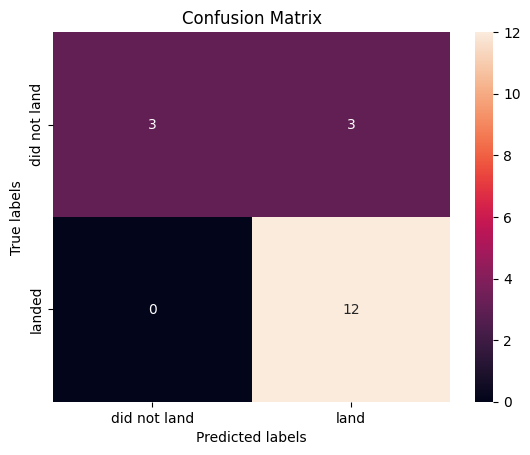

In [29]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
# Create a decision tree classifier object then  create a  GridSearchCV object tree_cv with cv = 10.
## Fit the object to find the best parameters from the dictionary parameters.

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [31]:
tree_cv = GridSearchCV(tree,param_grid=parameters,cv=10)
tree_cv.fit(X_test,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [32]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.95


In [ ]:
# Plot the decision tree for tree_cv using plot_tree module

from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
# Use tree_cv.best_estimator_ to access the best fitted DecisionTreeClassifier
plot_tree(tree_cv.best_estimator_)
plt.show()

In [ ]:
# calculate the accuracy on the test data using the method score
print('Accuracy for test data for tuned tree model is:', tree_cv.score(X_test,Y_test))

Accuracy for test data for tuned tree model is: 0.9444444444444444


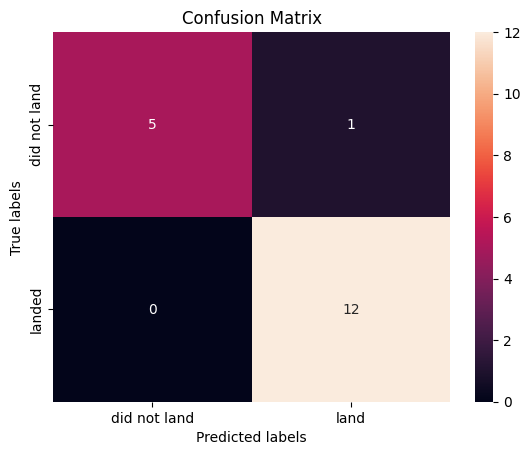

In [36]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [38]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [39]:
knn_cv = GridSearchCV(KNN,param_grid=parameters,cv=10)
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [40]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [41]:
print('Accuracy for test data for tuned knn model is:', knn_cv.score(X_test,Y_test))

Accuracy for test data for tuned knn model is: 0.8333333333333334


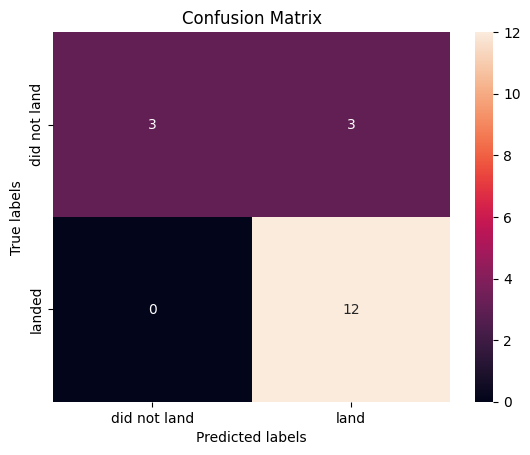

In [42]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

The next cell is to find which method performs the best


<ipython-input-55-e3a37be73c11>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Score', data=scores_df, ax=ax1, palette=['pink' if method == 'Decision Tree' else 'blue' for method in scores_df['Method']])
<ipython-input-55-e3a37be73c11>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Score (tuned)', data=scores_df, ax=ax2, palette=['pink' if method == 'Decision Tree' else 'blue' for method in scores_df['Method']])


Text(0.5, 1.0, 'Score (tuned)')

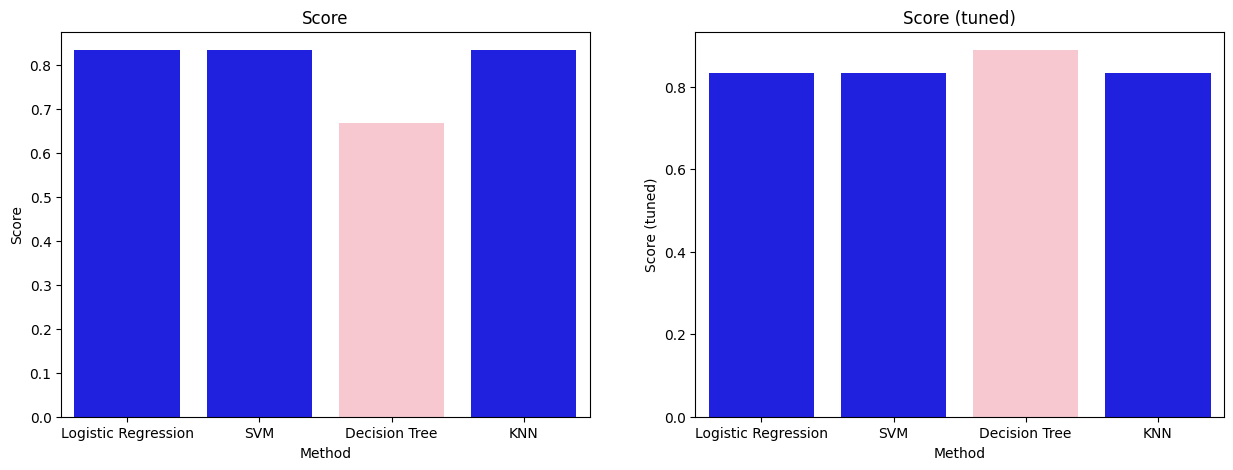

In [55]:
# put all scores in a dataframe for comparison
scores = {'Method':['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
        'Score':[lr.score(X_test,Y_test), svm.score(X_test,Y_test), tree.score(X_test,Y_test), knn_cv.score(X_test,Y_test)],
          'Score (tuned)':[logreg_cv.score(X_test,Y_test), svm_cv.score(X_test,Y_test), tree_cv.score(X_test,Y_test), knn_cv.score(X_test,Y_test)]
}

scores_df = pd.DataFrame(data=scores)

# visualize 2 bar chars in the same figure: first has x='Method', y='Score' and second has x='Method', y='Score (tuned)'
# the bar corresponding to x = 'Decision Tree' should appear in pink on both graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot 1
sns.barplot(x='Method', y='Score', data=scores_df, ax=ax1, palette=['pink' if method == 'Decision Tree' else 'blue' for method in scores_df['Method']])
ax1.set_title('Score')

# plot 2
sns.barplot(x='Method', y='Score (tuned)', data=scores_df, ax=ax2, palette=['pink' if method == 'Decision Tree' else 'blue' for method in scores_df['Method']])
ax2.set_title('Score (tuned)')
